In [1]:
# Importing necessary libraries and modules
import os
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
from utils import to_datetime
import matplotlib.pyplot as plt

In [2]:
# Load data
countries = pd.read_csv("./data/village_savings/Countries.csv")
locations = pd.read_csv("./data/village_savings/Locations.csv")
regions = pd.read_csv("./data/village_savings/Regions.csv")
members = pd.read_csv("./data/village_savings/Members.csv", sep="\t") #tab seperated csv
group_members = pd.read_csv("./data/village_savings/GroupMembers.csv")
groups = pd.read_csv("./data/village_savings/SavingsGroups.csv", sep="\t")


In [3]:
# Join data: Location Name, Region Name, and Country Name
groups = groups.merge(locations, on="LocationId").merge(regions, on="RegionId").merge(countries, on="CountryCode")

,MemberGroupID,MemberID,GroupID,IsMainMember,MemberStatusCode,DateCreated
0,1,1,1,1,A,2018-09-24 15:20:09.913
1,2,2,1,1,A,2018-09-24 16:04:22.800
2,3,3,1,1,A,2018-09-24 16:06:16.737
3,4,4,1,1,A,2018-09-24 16:08:06.967
4,5,5,1,1,A,2018-09-24 16:10:23.960
...,...,...,...,...,...,...
444,445,30499,30320,1,A,2020-12-04 14:03:29.247
445,446,30500,30321,1,A,2020-12-11 13:56:17.197
446,447,30501,30322,1,A,2020-12-16 09:20:37.627
447,448,30502,30322,1,A,2020-12-17 03:28:20.957


In [4]:
groups.head()

,GroupID,GroupName,MaximumMemberCount,LanguageCode,CurrencyCode,LocationId,IsActive,GroupStatusCode,GroupTypeCode,DateCreated,LocationName,RegionId,RegionName,CountryCode,CountryName,PhoneCode,IsKhusaServiceOffered,GMTHours
0,1,Brakus-Borer,20,en-GB,MWK,7,1,A,V,20:09.8,Lilongwe,2,Central,MW,Malawi,265,1,2
1,2,"Bergstrom, Raynor and Gutmann",10,en-GB,MWK,7,1,A,V,31:19.9,Lilongwe,2,Central,MW,Malawi,265,1,2
2,3,Carroll and Sons,8,en-GB,MWK,7,1,E,V,29:02.8,Lilongwe,2,Central,MW,Malawi,265,1,2
3,4,Hoppe-Lueilwitz,10,en-GB,MWK,7,1,E,M,04:19.3,Lilongwe,2,Central,MW,Malawi,265,1,2
4,8,Ward LLC,20,en-GB,MWK,7,1,E,V,05:46.1,Lilongwe,2,Central,MW,Malawi,265,1,2


In [5]:
# Get Member of groups
# groups[groups.GroupStatusCode != 'E']
groups['NumberOfMembers'] = 0
for idx, row in groups.iterrows():
   if row.IsKhusaServiceOffered == 1:
       groups.at[idx, 'NumberOfMembers'] = group_members[lambda x: x.GroupID == row.GroupID]['GroupID'].count()

In [6]:
# Create pivot table using RegionName and CountryName columns.
group_pivot_table = pd.pivot_table(groups[groups.NumberOfMembers > 0], values='NumberOfMembers', index=['CountryName', 'RegionName'], columns=['GroupName'], fill_value=0)

<AxesSubplot:xlabel='GroupName', ylabel='CountryName-RegionName'>

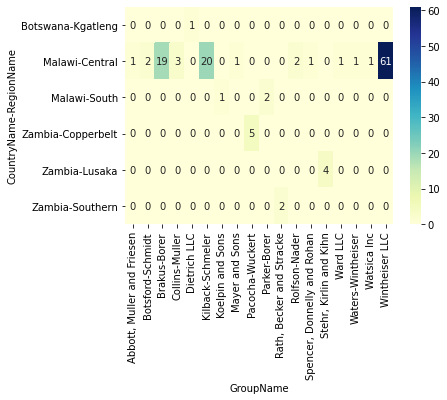

In [7]:
#Question 1. How many groups and members are there currently registered? And what is their geographical coverage? (Country and Region)
sns.heatmap(group_pivot_table, annot=True,  cmap="YlGnBu")

In [8]:
group_members.head()

,MemberGroupID,MemberID,GroupID,IsMainMember,MemberStatusCode,DateCreated
0,1,1,1,1,A,2018-09-24 15:20:09.913
1,2,2,1,1,A,2018-09-24 16:04:22.800
2,3,3,1,1,A,2018-09-24 16:06:16.737
3,4,4,1,1,A,2018-09-24 16:08:06.967
4,5,5,1,1,A,2018-09-24 16:10:23.960


In [15]:
# group_members = group_members.merge(members[['MemberID', 'Gender']], on="MemberID").merge(groups[['GroupID', 'GroupName', 'RegionName']], on="GroupID")
group_members = group_members.merge(members[['MemberID', 'Gender']], on="MemberID", how='left').merge(groups[['GroupID', 'GroupName', 'RegionName']], on="GroupID" , how="left")

<AxesSubplot:xlabel='GroupName'>

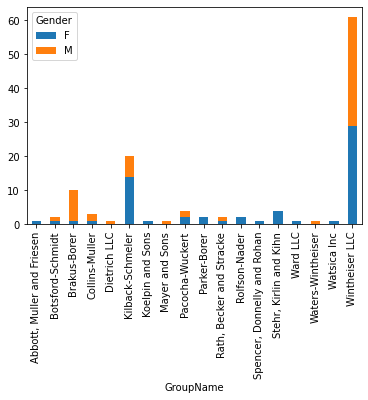

In [16]:
# pd.crosstab([group_members.GroupName],group_members.Gender).plot.bar()
group_members.groupby([group_members.GroupName, group_members.Gender]).Gender.size().unstack().plot.bar(stacked=True)

<AxesSubplot:xlabel='RegionName'>

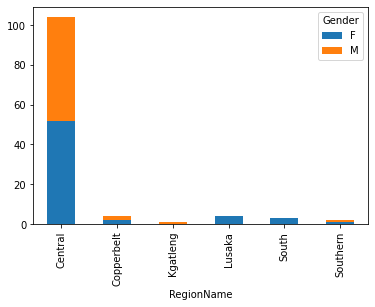

In [17]:
group_members.groupby([group_members.RegionName, group_members.Gender]).Gender.size().unstack().plot.bar(stacked=True)


<AxesSubplot:ylabel='NumberOfMembers'>

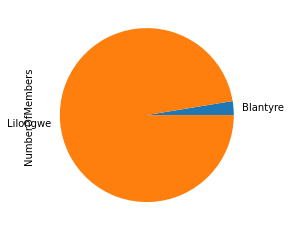

In [18]:
major_cities = ['Lilongwe', 'Zomba', 'Mzuzu', 'Blantyre'] #major cities in Malawi
# groups[groups.LocationName.isin(major_cities)]
groups[groups.CountryName == 'Malawi'][groups.LocationName.isin(major_cities)].groupby(['LocationName']).NumberOfMembers.sum().plot.pie()

In [19]:
group_members.head()

,MemberGroupID,MemberID,GroupID,IsMainMember,MemberStatusCode,DateCreated,Gender,GroupName,RegionName
0,1,1,1,1,A,2018-09-24 15:20:09.913,M,Brakus-Borer,Central
1,2,2,1,1,A,2018-09-24 16:04:22.800,M,Brakus-Borer,Central
2,3,3,1,1,A,2018-09-24 16:06:16.737,M,Brakus-Borer,Central
3,4,4,1,1,A,2018-09-24 16:08:06.967,M,Brakus-Borer,Central
4,5,5,1,1,A,2018-09-24 16:10:23.960,M,Brakus-Borer,Central


In [20]:
group_members.DateCreated = group_members.DateCreated.apply(lambda x: to_datetime(x, "%Y-%m-%d %H:%M:%S.%f")) #convert column to to_datetime

In [60]:
# group_members.groupby([group_members.DateCreated.dt.year]).MemberID.count().plot.line()
# group_members.groupby([group_members.DateCreated.dt.month, group_members.DateCreated.dt.year]).MemberID.max()



DateCreated  DateCreated
1            2019           10070
             2020           30309
2            2019           10110
             2020           30438
3            2019           10134
             2020           30447
4            2019           10149
             2020           30449
5            2019           10156
             2020           30450
6            2019           10162
7            2019           10198
8            2019           20196
9            2018              19
             2019           20201
10           2018              62
             2019           30198
11           2018              66
             2019           30205
12           2019           30241
             2020           30502
Name: MemberID, dtype: int64